In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_sub = pd.read_csv('sample_submission.csv')

In [3]:
test = test.join(sample_sub.set_index('Id'), on='Id')

In [4]:
data = pd.concat([train,test])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [7]:
data.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [5]:
data.Alley.fillna('no_alley',inplace = True)

In [11]:
data.Alley.value_counts()

no_alley    2721
Grvl         120
Pave          78
Name: Alley, dtype: int64

In [12]:
data.MiscFeature.value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [6]:
data.drop(['PoolQC','MiscFeature'], axis = 1, inplace = True)

In [15]:
data.Fence.value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [7]:
data.Fence.fillna('no_fence', inplace = True)

In [18]:
data.MSZoning.value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [20]:
data[data.MSZoning.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
455,1916,30,NaN,109.0,21780,Grvl,no_alley,Reg,Lvl,NaN,...,0,0,0,no_fence,0,3,2009,ConLD,Normal,173575.505287
756,2217,20,NaN,80.0,14584,Pave,no_alley,Reg,Low,AllPub,...,0,0,0,no_fence,0,2,2008,WD,Abnorml,172482.165793
790,2251,70,NaN,NaN,56600,Pave,no_alley,IR1,Low,AllPub,...,0,0,0,no_fence,0,1,2008,WD,Normal,280618.132617
1444,2905,20,NaN,125.0,31250,Pave,no_alley,Reg,Lvl,AllPub,...,0,0,0,no_fence,0,5,2006,WD,Normal,223667.404552


In [40]:
data[data.MSZoning == 'RL'].LotArea.describe()

count      2265.000000
mean      11169.471965
std        8432.535927
min        1700.000000
25%        8385.000000
50%       10000.000000
75%       12168.000000
max      215245.000000
Name: LotArea, dtype: float64

In [48]:
data.iloc[data[data.MSZoning.isnull()].index]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
455,456,20,RL,80.0,9600,Pave,no_alley,Reg,Lvl,AllPub,...,0,0,0,no_fence,0,9,2007,WD,Normal,175500.0
756,757,60,RL,68.0,10769,Pave,no_alley,IR1,Lvl,AllPub,...,0,0,0,no_fence,0,4,2009,WD,Normal,212000.0
790,791,120,RL,43.0,3182,Pave,no_alley,Reg,Lvl,AllPub,...,0,0,0,no_fence,0,9,2009,WD,Normal,160200.0
1444,1445,20,RL,63.0,8500,Pave,no_alley,Reg,Lvl,AllPub,...,0,0,0,no_fence,0,11,2007,WD,Normal,179600.0


In [49]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,no_alley,Reg,Lvl,AllPub,...,0,0,0,no_fence,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,no_alley,Reg,Lvl,AllPub,...,0,0,0,no_fence,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,no_alley,IR1,Lvl,AllPub,...,0,0,0,no_fence,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,no_alley,IR1,Lvl,AllPub,...,0,0,0,no_fence,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,no_alley,IR1,Lvl,AllPub,...,0,0,0,no_fence,0,12,2008,WD,Normal,250000.0


In [54]:
data.iloc[1455:1470]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,no_alley,Reg,Lvl,AllPub,...,0,0,0,no_fence,0,8,2007,WD,Normal,175000.000000
1456,1457,20,RL,85.0,13175,Pave,no_alley,Reg,Lvl,AllPub,...,0,0,0,MnPrv,0,2,2010,WD,Normal,210000.000000
1457,1458,70,RL,66.0,9042,Pave,no_alley,Reg,Lvl,AllPub,...,0,0,0,GdPrv,2500,5,2010,WD,Normal,266500.000000
1458,1459,20,RL,68.0,9717,Pave,no_alley,Reg,Lvl,AllPub,...,0,0,0,no_fence,0,4,2010,WD,Normal,142125.000000
1459,1460,20,RL,75.0,9937,Pave,no_alley,Reg,Lvl,AllPub,...,0,0,0,no_fence,0,6,2008,WD,Normal,147500.000000
0,1461,20,RH,80.0,11622,Pave,no_alley,Reg,Lvl,AllPub,...,0,120,0,MnPrv,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,no_alley,IR1,Lvl,AllPub,...,0,0,0,no_fence,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,no_alley,IR1,Lvl,AllPub,...,0,0,0,MnPrv,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,no_alley,IR1,Lvl,AllPub,...,0,0,0,no_fence,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,no_alley,IR1,HLS,AllPub,...,0,144,0,no_fence,0,1,2010,WD,Normal,150730.079977


In [8]:
data.reset_index(inplace = True)

In [56]:
data.iloc[1455:1470]

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1455,1456,60,RL,62.0,7917,Pave,no_alley,Reg,Lvl,...,0,0,0,no_fence,0,8,2007,WD,Normal,175000.000000
1456,1456,1457,20,RL,85.0,13175,Pave,no_alley,Reg,Lvl,...,0,0,0,MnPrv,0,2,2010,WD,Normal,210000.000000
1457,1457,1458,70,RL,66.0,9042,Pave,no_alley,Reg,Lvl,...,0,0,0,GdPrv,2500,5,2010,WD,Normal,266500.000000
1458,1458,1459,20,RL,68.0,9717,Pave,no_alley,Reg,Lvl,...,0,0,0,no_fence,0,4,2010,WD,Normal,142125.000000
1459,1459,1460,20,RL,75.0,9937,Pave,no_alley,Reg,Lvl,...,0,0,0,no_fence,0,6,2008,WD,Normal,147500.000000
1460,0,1461,20,RH,80.0,11622,Pave,no_alley,Reg,Lvl,...,0,120,0,MnPrv,0,6,2010,WD,Normal,169277.052498
1461,1,1462,20,RL,81.0,14267,Pave,no_alley,IR1,Lvl,...,0,0,0,no_fence,12500,6,2010,WD,Normal,187758.393989
1462,2,1463,60,RL,74.0,13830,Pave,no_alley,IR1,Lvl,...,0,0,0,MnPrv,0,3,2010,WD,Normal,183583.683570
1463,3,1464,60,RL,78.0,9978,Pave,no_alley,IR1,Lvl,...,0,0,0,no_fence,0,6,2010,WD,Normal,179317.477511
1464,4,1465,120,RL,43.0,5005,Pave,no_alley,IR1,HLS,...,0,144,0,no_fence,0,1,2010,WD,Normal,150730.079977


In [9]:
for i in data[data.MSZoning.isnull()].index:
    data.loc[i, 'MSZoning'] = 'RL'

In [10]:
data[data.MSZoning.isnull()]

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [103]:
data[data.LotFrontage.isnull()]

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,7,8,60,RL,NaN,10382,Pave,no_alley,IR1,Lvl,...,0,0,0,no_fence,350,11,2009,WD,Normal,200000.000000
12,12,13,20,RL,NaN,12968,Pave,no_alley,IR2,Lvl,...,0,176,0,no_fence,0,9,2008,WD,Normal,144000.000000
14,14,15,20,RL,NaN,10920,Pave,no_alley,IR1,Lvl,...,0,0,0,GdWo,0,5,2008,WD,Normal,157000.000000
16,16,17,20,RL,NaN,11241,Pave,no_alley,IR1,Lvl,...,0,0,0,no_fence,700,3,2010,WD,Normal,149000.000000
24,24,25,20,RL,NaN,8246,Pave,no_alley,IR1,Lvl,...,0,0,0,MnPrv,0,5,2010,WD,Normal,154000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,1387,2848,20,RL,NaN,11088,Pave,no_alley,Reg,Lvl,...,0,0,0,no_fence,0,6,2006,WD,Normal,158540.947801
2850,1390,2851,60,RL,NaN,21533,Pave,no_alley,IR2,Lvl,...,0,0,0,no_fence,0,8,2006,WD,Normal,221134.533635
2900,1440,2901,20,RL,NaN,50102,Pave,no_alley,IR1,Low,...,0,138,0,no_fence,0,3,2006,WD,Alloca,245283.198338
2901,1441,2902,20,RL,NaN,8098,Pave,no_alley,IR1,Lvl,...,0,0,0,no_fence,0,10,2006,WD,Normal,170351.963411


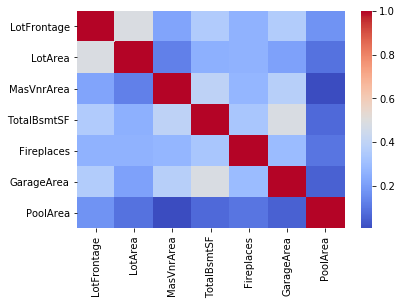

In [110]:
sns.heatmap(data[['LotFrontage','LotArea','MasVnrArea','TotalBsmtSF','Fireplaces','GarageArea','PoolArea']].corr(),  cmap = 'coolwarm')

In [111]:
data.LotFrontage.describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [10]:
for i in data[data.LotFrontage.isnull()].index:
    data.loc[i, 'LotFrontage'] = data.LotFrontage.median()

In [11]:
data.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [11]:
for i in data[data.Utilities.isnull()].index:
    data.loc[i, 'Utilities'] = 'AllPub'

In [124]:
data.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [12]:
for i in data[data.Exterior1st.isnull()].index:
    data.loc[i, 'Exterior1st'] = 'VinylSd'

In [13]:
for i in data[data.Exterior2nd.isnull()].index:
    data.loc[i, 'Exterior2nd'] = 'VinylSd'

In [135]:
data.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [137]:
data[data.MasVnrType.isnull()]

234       NaN
529       NaN
650       NaN
936       NaN
973       NaN
977       NaN
1243      NaN
1278      NaN
1691      NaN
1706      NaN
1882      NaN
1992      NaN
2004      NaN
2041      NaN
2311      NaN
2325      NaN
2340      NaN
2349      NaN
2368      NaN
2592      NaN
2610    198.0
2657      NaN
2686      NaN
2862      NaN
Name: MasVnrArea, dtype: float64

In [14]:
for i in data[data.MasVnrType.isnull()].index:
    if data.loc[i, 'Exterior1st'] == 'VinylSd':
        data.loc[i, 'MasVnrType'] = 'BrkFace'
    else:
        data.loc[i, 'MasVnrType'] = 'None'

In [146]:
data.MasVnrArea.describe()

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [15]:
for i in data[data.MasVnrArea.isnull()].index:
    data.loc[i, 'MasVnrArea'] = 0.0

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2919 non-null   int64  
 1   Id             2919 non-null   int64  
 2   MSSubClass     2919 non-null   int64  
 3   MSZoning       2919 non-null   object 
 4   LotFrontage    2919 non-null   float64
 5   LotArea        2919 non-null   int64  
 6   Street         2919 non-null   object 
 7   Alley          2919 non-null   object 
 8   LotShape       2919 non-null   object 
 9   LandContour    2919 non-null   object 
 10  Utilities      2919 non-null   object 
 11  LotConfig      2919 non-null   object 
 12  LandSlope      2919 non-null   object 
 13  Neighborhood   2919 non-null   object 
 14  Condition1     2919 non-null   object 
 15  Condition2     2919 non-null   object 
 16  BldgType       2919 non-null   object 
 17  HouseStyle     2919 non-null   object 
 18  OverallQ

In [18]:
data.BsmtQual.value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [16]:
data.BsmtQual.fillna('no_basement',inplace = True)

In [17]:
data.BsmtCond.fillna('no_basement',inplace = True)

In [18]:
data.BsmtExposure.fillna('no_basement',inplace = True)

In [19]:
data.BsmtFinType1.fillna('no_basement',inplace = True)

In [20]:
data.BsmtFinType2.fillna('no_basement',inplace = True)

In [29]:
data[data.BsmtFinType1 == 'no_basement'].BsmtFinSF1.describe()

count    78.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: BsmtFinSF1, dtype: float64

In [21]:
data.BsmtFinSF1.fillna(0.0 ,inplace = True)

In [22]:
data.BsmtFinSF2.fillna(0.0 ,inplace = True)

In [23]:
data.BsmtUnfSF.fillna(0.0 ,inplace = True)

In [24]:
data.TotalBsmtSF.fillna(0.0 ,inplace = True)

In [36]:
data.Electrical.value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [37]:
data.CentralAir.value_counts()

Y    2723
N     196
Name: CentralAir, dtype: int64

In [40]:
data.SalePrice.describe()

count      2919.000000
mean     180052.854647
std       57381.565721
min       34900.000000
25%      154795.084126
50%      176734.841494
75%      191895.744157
max      755000.000000
Name: SalePrice, dtype: float64

In [25]:
data.Electrical.fillna('SBrkr' ,inplace = True)

In [44]:
data.BsmtFullBath.value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

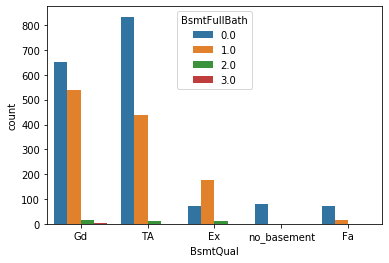

In [51]:
sns.countplot('BsmtQual',hue = 'BsmtFullBath', data = data)

In [48]:
data[data.BsmtHalfBath.isnull()].BsmtQual

2120    no_basement
2188    no_basement
Name: BsmtQual, dtype: object

In [26]:
data.BsmtFullBath.fillna(0.0 ,inplace = True)

In [27]:
data.BsmtHalfBath.fillna(0.0 ,inplace = True)

In [55]:
data.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [56]:
data[data.KitchenQual.isnull()].KitchenAbvGr

1555    1
Name: KitchenAbvGr, dtype: int64

In [59]:
data.KitchenAbvGr.value_counts()

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

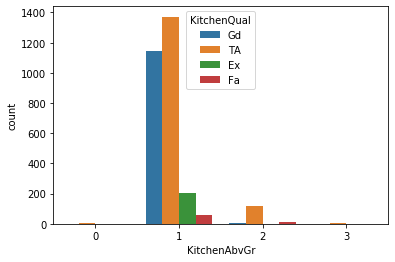

In [61]:
sns.countplot('KitchenAbvGr',hue = 'KitchenQual', data = data)

In [28]:
data.KitchenQual.fillna('TA' ,inplace = True)

In [63]:
data.Functional.value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [64]:
data.OverallCond.value_counts()

5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

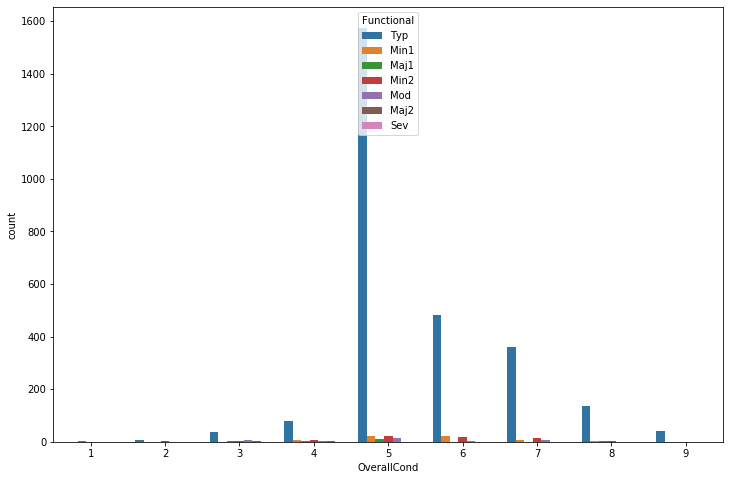

In [29]:
plt.figure(figsize=(12,8))
sns.countplot('OverallCond',hue = 'Functional', data = data)

In [30]:
data.Functional.fillna('Typ' ,inplace = True)

In [31]:
data.FireplaceQu.fillna('no_fireplace' ,inplace = True)

In [71]:
data.GarageType.value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [32]:
data.GarageType.fillna('no_garage' ,inplace = True)

In [33]:
data.GarageYrBlt = data.GarageYrBlt.astype('object')

In [34]:
data.GarageYrBlt.fillna('no_garage', inplace = True)

In [35]:
data.GarageCars.fillna(0.0, inplace = True)

In [36]:
data.GarageFinish.fillna('no_garage', inplace = True)

In [37]:
data.GarageArea.fillna(0.0, inplace = True)

In [38]:
data.GarageQual.fillna('no_garage', inplace = True)

In [39]:
data.GarageCond.fillna('no_garage', inplace = True)

In [87]:
data.SaleType.value_counts()

WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [40]:
data.SaleType.fillna('WD', inplace = True)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2919 non-null   int64  
 1   Id             2919 non-null   int64  
 2   MSSubClass     2919 non-null   int64  
 3   MSZoning       2919 non-null   object 
 4   LotFrontage    2919 non-null   float64
 5   LotArea        2919 non-null   int64  
 6   Street         2919 non-null   object 
 7   Alley          2919 non-null   object 
 8   LotShape       2919 non-null   object 
 9   LandContour    2919 non-null   object 
 10  Utilities      2919 non-null   object 
 11  LotConfig      2919 non-null   object 
 12  LandSlope      2919 non-null   object 
 13  Neighborhood   2919 non-null   object 
 14  Condition1     2919 non-null   object 
 15  Condition2     2919 non-null   object 
 16  BldgType       2919 non-null   object 
 17  HouseStyle     2919 non-null   object 
 18  OverallQ

In [41]:
data.shape

(2919, 80)

In [42]:
data = pd.get_dummies(data)

In [44]:
data.shape

(2919, 399)

In [45]:
data.head()

,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,0,0,0,1,0,0,0,0,1,0
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,0,0,0,1,0,0,0,0,1,0
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,0,0,0,1,0,0,0,0,1,0
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,0,0,0,1,1,0,0,0,0,0
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,0,0,0,1,0,0,0,0,1,0


In [44]:
len(train)

1460

In [43]:
len(data)

2919

In [46]:
del data['index']

In [47]:
train_proc = data.loc[:1459]

In [46]:
train_proc.tail()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,...,0,0,0,1,0,0,0,0,1,0
1459,1460,20,75.0,9937,5,6,1965,1965,0.0,830.0,...,0,0,0,1,0,0,0,0,1,0


In [48]:
len(train_proc) == len(train)

True

In [49]:
test_proc = data.loc[1460:]

In [50]:
len(test_proc) == len(test)

True

In [135]:
test_proc.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1460,1461,20,RH,80.0,11622,Pave,no_alley,Reg,Lvl,AllPub,...,0,120,0,MnPrv,0,6,2010,WD,Normal,169277.052498
1461,1462,20,RL,81.0,14267,Pave,no_alley,IR1,Lvl,AllPub,...,0,0,0,no_fence,12500,6,2010,WD,Normal,187758.393989
1462,1463,60,RL,74.0,13830,Pave,no_alley,IR1,Lvl,AllPub,...,0,0,0,MnPrv,0,3,2010,WD,Normal,183583.683570
1463,1464,60,RL,78.0,9978,Pave,no_alley,IR1,Lvl,AllPub,...,0,0,0,no_fence,0,6,2010,WD,Normal,179317.477511
1464,1465,120,RL,43.0,5005,Pave,no_alley,IR1,HLS,AllPub,...,0,144,0,no_fence,0,1,2010,WD,Normal,150730.079977


In [108]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [51]:
X_train = train_proc.drop('SalePrice', axis = 1)
y_train = train_proc.SalePrice

In [52]:
X_test = test_proc.drop('SalePrice', axis = 1)
y_test = test_proc.SalePrice

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
gbr = GradientBoostingRegressor()

In [128]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [139]:
prev_gbr = gbr.predict(X_test)

In [58]:
from sklearn.model_selection import cross_val_score

In [61]:
gbr = GradientBoostingRegressor(n_estimators=300)

In [66]:
cv_scores = cross_val_score(gbr, X_train, y_train, scoring= 'neg_mean_squared_error', cv = 5)

In [67]:
import xgboost as xgb

In [78]:
from xgboost import XGBRegressor

In [69]:
xgb = xgb.XGBRegressor(n_estimators = 300)

In [70]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [71]:
prev_xgb = xgb.predict(X_test)

In [73]:
sample_sub['SalePrice'] = prev_xgb

In [75]:
sample_sub.to_csv('rawsub5.csv', index = False)

In [91]:
params = {'colsample_bytree':[0.6,0.8,1],'max_depth':[3,4,5],'min_child_weight':[1,5,10],'subsample':[0.6,0.8,1],'n_estimators':[300,400,500,600]}

In [86]:
grid_xgb = GridSearchCV(XGBRegressor(), param_grid=params)

In [101]:
params = {'max_depth':[3,4],'min_samples_leaf':[1,2],'subsample':[0.8,1]}

In [84]:
gbr_op = GradientBoostingRegressor()

In [102]:
grid_gbr_op = GridSearchCV(GradientBoostingRegressor(n_estimators=300),params)

In [103]:
grid_gbr_op.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=300,
                                                 n_iter_no_change=None,
              

In [104]:
grid_gbr_op.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'subsample': 0.8}

In [105]:
prev_gbr_op = grid_gbr_op.predict(X_test)

In [106]:
sample_sub['SalePrice'] = prev_gbr_op

In [107]:
sample_sub.to_csv('rawsub6.csv', index = False)

In [95]:
params = {'n_estimators':[300, 350, 400]}

In [96]:
gbr_op = GradientBoostingRegressor(min_samples_leaf=1,max_depth=4,subsample=0.8)

In [97]:
grid_gbr_op = GridSearchCV(gbr_op,params)

In [98]:
grid_gbr_op.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=4,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [99]:
grid_gbr_op.best_params_

{'n_estimators': 300}

In [100]:
prev_gbr_op = grid_gbr_op.predict(X_test)

In [102]:
sample_sub.SalePrice = prev_gbr_op
sample_sub.to_csv('rawsub7.csv',index=False)

In [54]:
gbr_op = GradientBoostingRegressor(min_samples_leaf=1, n_estimators=300,max_depth=4,subsample=0.8)

In [55]:
gbr_op.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
importances = gbr_op.feature_importances_

In [57]:
fs = pd.DataFrame({'importance':importances, 'features':X_train.columns})

In [58]:
fs.sort_values(by='importance', inplace = True, ascending=False)

In [59]:
sum_imp = 0
sum_impor = []
for i in fs.importance:
    sum_imp += i
    sum_impor.append(sum_imp)
fs['soma_ac'] = sum_impor

In [60]:
fs = fs[fs.soma_ac < 0.99]

In [61]:
len(fs)

83

In [62]:
fs.head()

,importance,features,soma_ac
4,0.504320,OverallQual,0.504320
16,0.125879,GrLivArea,0.630199
14,0.040947,2ndFlrSF,0.671145
9,0.033187,BsmtFinSF1,0.704332
12,0.033052,TotalBsmtSF,0.737384


In [63]:
X_train2 = X_train[fs.features]

In [64]:
X_test2 = X_test[fs.features]

In [66]:
params = {'n_estimators':[200, 250, 300], 'subsample':[0.8, 1], 'min_samples_leaf':[1,2]}

In [69]:
grid_gbr_sf = GridSearchCV(GradientBoostingRegressor(),params)

In [70]:
grid_gbr_sf.fit(X_train2,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [71]:
grid_gbr_sf.best_params_

{'min_samples_leaf': 2, 'n_estimators': 250, 'subsample': 0.8}

In [72]:
prev_gbr_sf = grid_gbr_sf.predict(X_test2)

In [73]:
sample_sub.SalePrice = prev_gbr_sf

In [74]:
sample_sub

,Id,SalePrice
0,1461,121600.817674
1,1462,164181.632000
2,1463,183194.781326
3,1464,194676.653622
4,1465,187152.448105
...,...,...
1454,2915,82209.077544
1455,2916,83324.091083
1456,2917,165011.017491
1457,2918,120797.481896


In [75]:
sample_sub.to_csv('rawsub9.csv',index=False)

In [85]:
gbr_op = GradientBoostingRegressor(min_samples_leaf=1, n_estimators=300,max_depth=4,subsample=0.8)

In [86]:
gbr_op.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [87]:
prev_gbr_op = gbr_op.predict(X_test)

In [88]:
sample_sub.SalePrice = prev_gbr_op

In [90]:
sample_sub.to_csv('raxsub7.csv',index = False)

In [142]:
from sklearn import metrics

In [147]:
sample_sub.SalePrice = prev_gbr

In [149]:
sample_sub.to_csv('rawsub.csv')

In [151]:
len(sample_sub)

1459

In [162]:
sample_sub = pd.read_csv('sample_submission.csv')

In [153]:
len(sample_sub)

1459

In [154]:
sample_sub.shape

(1459, 2)

In [157]:
sample_sub['SalePrice'] = prev_gbr

In [159]:
sample_sub.to_csv('rawsub.csv')

In [182]:
rawsub.to_csv('raw_sub.csv')

In [195]:
seila.to_csv('rawrawraw.csv')

In [199]:
rawsub.to_csv('rawsub.csv', index = False)

In [200]:
from sklearn.ensemble import RandomForestRegressor

In [201]:
rfr = RandomForestRegressor()

In [202]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [203]:
prev_rfr = rfr.predict(X_test)

In [206]:
sample_sub['SalePrice'] = prev_rfr

In [207]:
sample_sub.to_csv('rawsub2.csv', index = False)

# partiu comecar a otimizar o nosso modelo de GBR

In [208]:
gbr_ot = GradientBoostingRegressor()

In [209]:
gbr_ot.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [210]:
importances = gbr_ot.feature_importances_

In [213]:
imp_ind = importances.argsort()
importances_sort = importances[imp_ind]

In [222]:
len(importances)

397

In [224]:
len(X_train.columns)

397

In [54]:
from sklearn.feature_selection import RFE

In [226]:
gbr_rfe = GradientBoostingRegressor()

In [227]:
rfe = RFE(gbr_rfe,100).fit(X_train,y_train)

In [228]:
prev_rfe = rfe.predict(X_test)

In [230]:
len(prev_rfe)

1459

In [232]:
sample_sub['SalePrice'] = prev_rfe

In [233]:
sample_sub.to_csv('rawsub3.csv', index = False)

In [236]:
prev_rfe

array([123833.84511483, 160233.45138426, 179323.80616442, ...,
       165501.88512286, 121450.79053909, 230014.64195298])

In [235]:
rawsub

,Id,SalePrice
0,1461,123833.845115
1,1462,160233.451384
2,1463,179323.806164
3,1464,181133.642908
4,1465,192749.135032
...,...,...
1454,2915,81972.417888
1455,2916,90597.618227
1456,2917,165501.885123
1457,2918,121450.790539


In [237]:
print ('RMSE', np.sqrt(metrics.mean_squared_error(y_test, prev_rfr)))

RMSE 69892.25272151212


In [238]:
print ('RMSE', np.sqrt(metrics.mean_squared_error(y_test, prev_rfe)))

RMSE 72581.69117500132


In [240]:
print (rfe.ranking_)

[  1   5   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
  16   1   1   1   1   1   1   1   1   1   1   1  22   1   1  32   1   1
   1   1   9   1   1  48  42  47  77  50  59   1  46   8   1  51   1  56
  53  66  67   1  68   1  75  76  78  86  84  88  83   1   1  94   1   1
 102  93 130   1   1 128 108 115 111 113 118 126 138   1   1 129 134   1
   1   1 141 142 140 139 150 148 163 154   1 183   1 170 187 174   1 185
 171 168  23   1 191 188 195 202 173 192   1 197 198 224 179 201 206 208
   1 215 199 200 218 219   1 229 225 226   1 227 237   1 247 240 235 249
 223 251 253 255 257 258 250 263 238 265 244 261 275 259 267 273 269 279
 271 281 286 288 295 283 291 285 294   1 293 277   1 243  45  69  79  89
  95  97  99   1 105   1 119 121 143 144 151 155 157 158   1 203   1 297
 298 296   1 292 290 284 282 280 278 276 274 272 270 268 266 264 262 260
 230 256 254   1 248 246 242   1   1  33  26  35  34  30   1  58  54   1
  43  39  38  55  61  37   1  60  64  57  52  11   

In [241]:
from sklearn.svm import SVR

In [242]:
svr = SVR()

In [243]:
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [244]:
prev_svr = svr.predict(X_test)

In [246]:
sample_sub['SalePrice'] = prev_svr

In [68]:
from sklearn.model_selection import GridSearchCV

# esqueci q o svm precisa de parametros bem ajustados

In [250]:
parametros = {'C':[0.1,1,10,100], 'gamma': [1, 0.1, 0.01, 0.001]}

In [251]:
grid = GridSearchCV(SVR(),parametros)

In [252]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [253]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [254]:
prev_svr = grid.predict(X_test)

In [256]:
prev_svr

array([163000., 163000., 163000., ..., 163000., 163000., 163000.])

## ficou horrivel

In [261]:
param2 = {'n_estimators':range(250,401,50)}

In [262]:
grid2 = GridSearchCV(GradientBoostingRegressor(),param2)

In [263]:
grid2.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [264]:
grid2.best_params_

{'n_estimators': 300}

In [265]:
gbr2 = GradientBoostingRegressor(n_estimators=300)

In [266]:
gbr2.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [267]:
prev_gbr2 = gbr2.predict(X_test)

In [268]:
prev_gbr2

array([119146.26524181, 162782.55380584, 181737.39497128, ...,
       165225.02607709, 116756.05080975, 222654.14384935])

In [270]:
sample_sub.SalePrice = prev_gbr2

In [272]:
sample_sub['SalePrice'] = prev_gbr2

In [274]:
sample_sub.to_csv('rawsub4.csv',index = False)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0
